### Predicting the customers who will buy caravan(Travel Trailer) insurance policy

OBJECTIVE: To predict whether the customer will buy caravan inusrance or not.

### Team Ninjas

Pavan Kumar Goud Pabba (U03741351)\
Revanth Mandadi (U16653207)\
Sai Sunil Gangupamu (U63410293)\
Hari Krishna Ageer (U18952413)\
Lavanya Peddireddy(U00142531)\
Naga Gayathiri Devi Kasturi(U15971801)



### Data Description:

ticdata2000.csv: This dataset contains both features and the target variable. It has been designated as the training set. From this, we've created a split between training and validation datasets to train our model and validate its performance.

ticeval2000.csv: This dataset is formatted similarly to ticdata2000.csv but does not include the target variable. It represents new, unseen data. We have applied our best-performing model on it, as determined from the training/validation process, to predict the target values for this dataset.

tictgts2000.csv: This dataset consists solely of the target variable.And we compare target values dataset with predicted values from ticeval2000 dataset, thus determining the model's performance on unseen data. This step simulates a real-world scenario where the model's ability to generalize is tested.

Approach:

A high recall rate means that the model is good at identifying actual buyers (minimizing the number of false negatives), which is crucial if the cost of missing a potential buyer is high. So we are choosing recall as important parameter here.

### Data Preprocessing

Step 1: Import required libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.utils import resample

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report,
    roc_curve, auc, roc_auc_score
)

# Set warnings to ignore to clean up output
warnings.filterwarnings('ignore')


### Loading the dataset

In [ ]:
#Load the data sets
train_data = pd.read_csv('/content/ticdata2000.csv', delimiter=',')
eval_data = pd.read_csv('/content/ticeval2000.csv', delimiter=',')
target_data = pd.read_csv('/content/tictgts2000.csv', delimiter=',')

In [ ]:
#(rows,cols)
train_data.shape

(5822, 86)

In [ ]:
train_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Describing the training data
train_data.describe()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [ ]:
#(rows,cols of evaluating data)
eval_data.shape

(4000, 85)

In [ ]:
eval_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#describe the evaluating data
eval_data.describe()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.084500,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.394206,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,5.000000,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [ ]:
#rows and cols of target data
target_data.shape

(4000, 1)

In [ ]:
target_data.head()

,CARAVAN
0,0
1,1
2,0
3,0
4,0


In [ ]:
#describing the target data
target_data.describe()

,CARAVAN
count,4000.000000
mean,0.059500
std,0.236588
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#Checking missing values.
train_data.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [ ]:
#Checking missing values.
target_data.isnull().sum()

CARAVAN    0
dtype: int64

In [ ]:
print(train_data.dtypes)

MOSTYPE     int64
MAANTHUI    int64
MGEMOMV     int64
MGEMLEEF    int64
MOSHOOFD    int64
            ...  
APLEZIER    int64
AFIETS      int64
AINBOED     int64
ABYSTAND    int64
CARAVAN     int64
Length: 86, dtype: object


In [ ]:
print(target_data.dtypes)

CARAVAN    int64
dtype: object


In [ ]:
print(target_data.dtypes)

CARAVAN    int64
dtype: object


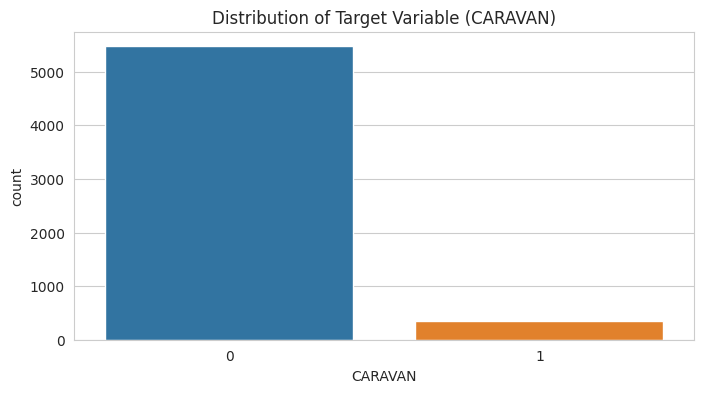

(           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
 count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
 mean     24.253349     1.110615     2.678805     2.991240     5.773617   
 std      12.846706     0.405842     0.789835     0.814589     2.856760   
 min       1.000000     1.000000     1.000000     1.000000     1.000000   
 25%      10.000000     1.000000     2.000000     2.000000     3.000000   
 50%      30.000000     1.000000     3.000000     3.000000     7.000000   
 75%      35.000000     1.000000     3.000000     3.000000     8.000000   
 max      41.000000    10.000000     5.000000     6.000000    10.000000   
 
             MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
 count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
 mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
 std       1.003234     1.715843     1.017503     1.597647     1.909482  ...   
 mi

In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Summary statistics for all the attributes
summary_statistics = train_data.describe()

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='CARAVAN', data=train_data)
plt.title('Distribution of Target Variable (CARAVAN)')
plt.show()

# Checking the balance of the target variable
target_balance = train_data['CARAVAN'].value_counts(normalize=True)

summary_statistics, target_balance

Regarding the class distribution of the target variable CARAVAN in the training data, it is indeed highly imbalanced:


94.02% of the instances belong to class 0
(customers without a caravan insurance policy).


5.98% of the instances belong to class 1
(customers with a caravan insurance policy).

This imbalance can significantly impact the performance of machine learning models, as they might become biased towards the majority class.

SMOTE creates new, synthetic instances that are similar to the existing ones

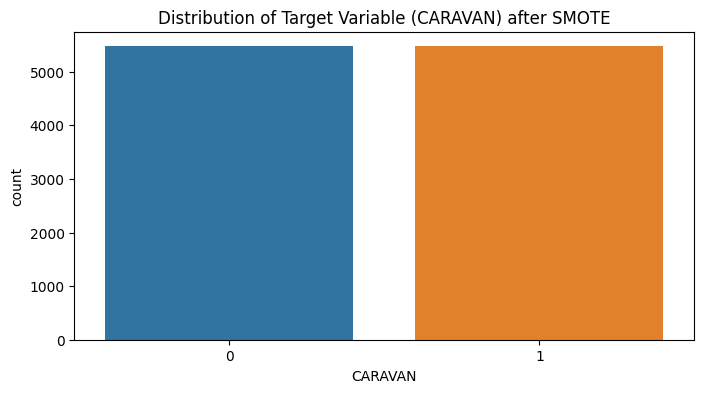

0    5474
1    5474
Name: CARAVAN, dtype: int64


In [ ]:
# Separate predictors and the target variable
X = train_data.drop('CARAVAN', axis=1)
y = train_data['CARAVAN']

# Initialize the SMOTE object
smote = SMOTE(random_state=123)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled predictors and targets into one dataframe
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Plot the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x='CARAVAN', data=resampled_data)
plt.title('Distribution of Target Variable (CARAVAN) after SMOTE')
plt.show()

# Check the new class distribution
print(resampled_data['CARAVAN'].value_counts())


Now that we have a balanced dataset, we can proceed with training a predictive model.

Check correlation of the variables with CARAVAN

In [ ]:
# correlation of train data
train_data.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723,-0.069300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APLEZIER,-0.018162,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,...,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325,0.105700
AFIETS,-0.015774,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,...,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246,0.034144
AINBOED,-0.021087,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,...,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273,0.018026
ABYSTAND,-0.053718,-0.004166,0.028384,-0.014540,-0.051723,-0.004009,0.016658,0.010127,-0.027291,0.036569,...,-0.008693,0.114810,-0.007119,0.034854,-0.002698,0.026325,0.009246,0.021273,1.000000,0.066658


In [ ]:
train_data['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

           MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK  \
MOSTYPE   1.000000 -0.023098 -0.090255  0.037485  0.993163 -0.183885   
MAANTHUI -0.023098  1.000000  0.086381  0.040403 -0.026782  0.017152   
MGEMOMV  -0.090255  0.086381  1.000000 -0.335707 -0.061194  0.068894   
MGEMLEEF  0.037485  0.040403 -0.335707  1.000000  0.033299 -0.018499   
MOSHOOFD  0.993163 -0.026782 -0.061194  0.033299  1.000000 -0.184537   
...            ...       ...       ...       ...       ...       ...   
APLEZIER -0.008353 -0.004972 -0.008011  0.000761 -0.012176 -0.000494   
AFIETS    0.017594 -0.016543  0.032747  0.030073  0.016674 -0.005304   
AINBOED  -0.005984  0.022233  0.022677 -0.007357 -0.005081 -0.003177   
ABYSTAND -0.039686  0.000409  0.023806 -0.000254 -0.038958  0.009268   
CARAVAN  -0.153793 -0.095162 -0.029018 -0.136255 -0.167464 -0.099721   

            MGODPR    MGODOV    MGODGE    MRELGE  ...  APERSONG   AGEZONG  \
MOSTYPE   0.068583 -0.033177  0.044746 -0.110547  ...  0.0

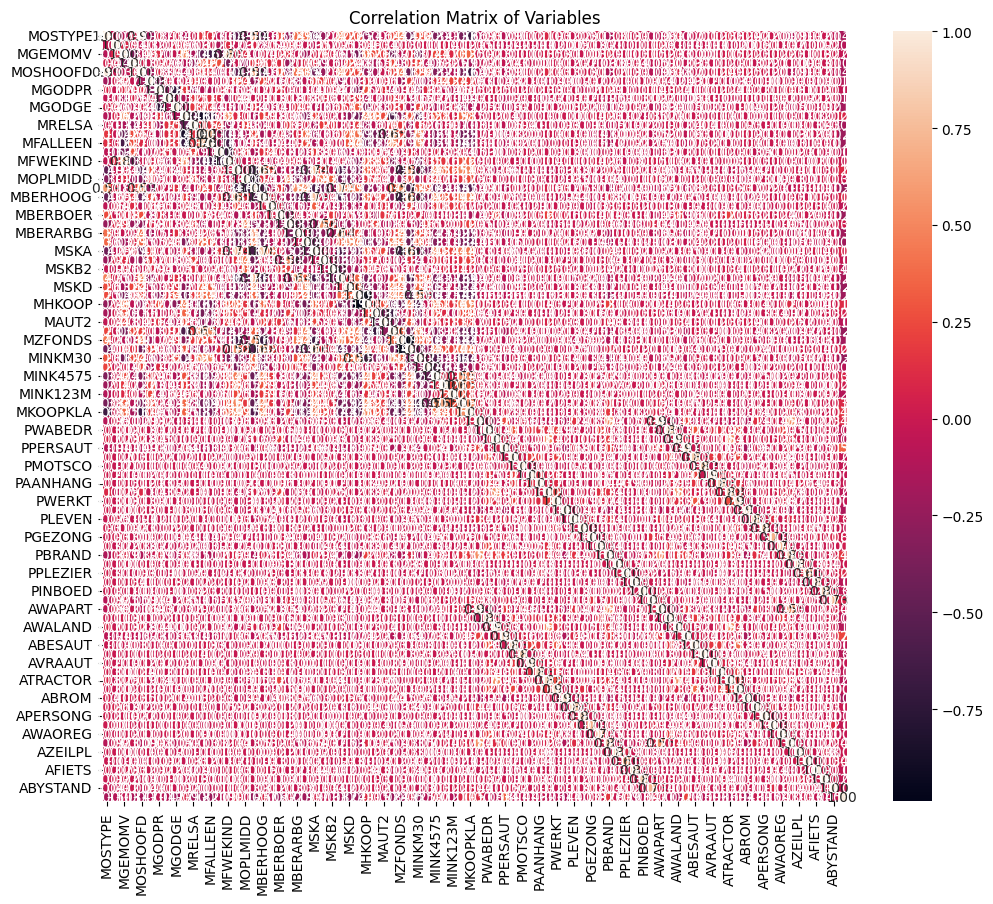

['MOSTYPE', 'MAANTHUI', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MOPLHOOG', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWALAND', 'PPERSAUT', 'PTRACTOR', 'PBROM', 'PBRAND', 'PPLEZIER', 'PFIETS', 'PBYSTAND', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AAANHANG', 'ATRACTOR', 'ABROM']


In [ ]:
# Calculate the correlation matrix
correlation_matrix = resampled_data.corr()

print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Select the most correlated features excluding the target itself ('CARAVAN')
correlated_features = ['MOSTYPE', 'MAANTHUI', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MOPLHOOG', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWALAND', 'PPERSAUT', 'PTRACTOR', 'PBROM', 'PBRAND', 'PPLEZIER', 'PFIETS', 'PBYSTAND', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AAANHANG', 'ATRACTOR', 'ABROM']

print(correlated_features)

In [ ]:
# Select only the most correlated features for the model
X = resampled_data[correlated_features]
y = resampled_data['CARAVAN']

# Perform the train/test split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Checking the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8758, 52), (2190, 52), (8758,), (2190,))

In [ ]:
# Create a standard scaler and fit it to the training set of predictors
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=correlated_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=correlated_features)

# Check the first few rows of the scaled training data
X_train_scaled_df.head()

,MOSTYPE,MAANTHUI,MGEMLEEF,MOSHOOFD,MGODRK,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,PFIETS,PBYSTAND,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM
0,-1.008610,-0.247300,-1.204358,-0.788966,0.459205,2.182793,0.640124,0.409659,0.301160,-0.627907,...,-0.118362,-0.162747,-0.080471,-0.103035,0.605913,-0.058847,-0.141116,-0.071272,-0.103535,-0.190967
1,-0.859494,-0.247300,0.153316,-0.788966,1.611561,-1.023306,-1.964689,1.587531,-0.875273,-1.275178,...,-0.118362,-0.162747,-0.080471,-0.103035,-1.226472,-0.058847,-0.141116,-0.071272,-0.103535,-0.190967
2,0.035202,-0.247300,0.153316,-0.117496,1.611561,1.114093,-0.011079,-0.768212,1.477593,0.666634,...,-0.118362,-0.162747,-0.080471,-0.103035,-1.226472,-0.058847,-0.141116,-0.071272,-0.103535,-0.190967
3,-0.859494,2.786114,-1.204358,-0.788966,-0.693150,-1.023306,-1.964689,1.587531,-0.875273,-1.275178,...,-0.118362,-0.162747,-0.080471,-0.103035,-1.226472,-0.058847,-0.141116,-0.071272,-0.103535,-0.190967
4,1.153572,-0.247300,0.153316,1.225444,0.459205,0.045394,-0.011079,-0.768212,1.477593,0.666634,...,-0.118362,-0.162747,-0.080471,-0.103035,-1.226472,-0.058847,-0.141116,-0.071272,-0.103535,-0.190967


### Model Fitting

#### Decision Tree

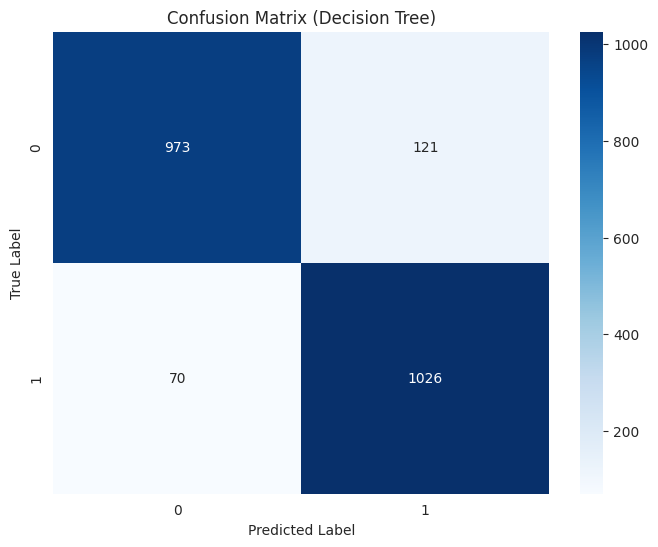

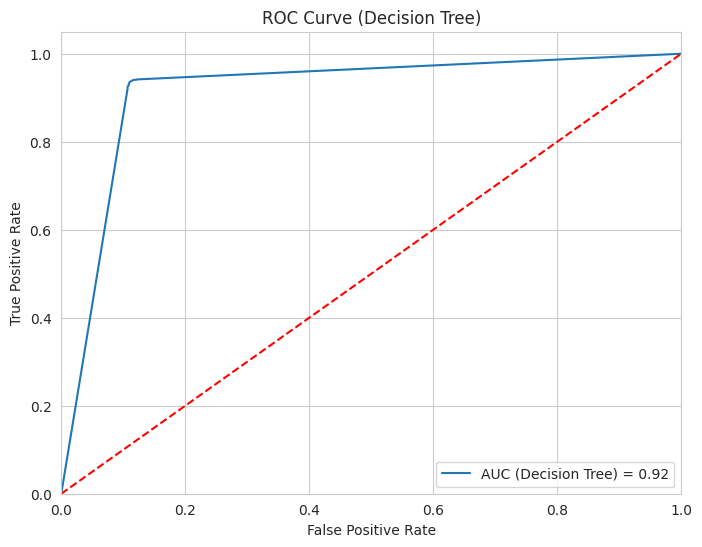

Accuracy: 0.9127853881278539
Recall: 0.9361313868613139
Precision: 0.8945074106364429
F1 Score: 0.9148461881408828
AUC: 0.9156872589706294
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1094
           1       0.89      0.94      0.91      1096

    accuracy                           0.91      2190
   macro avg       0.91      0.91      0.91      2190
weighted avg       0.91      0.91      0.91      2190



In [ ]:
# Fit the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Classification report
class_report_dt = classification_report(y_test, y_pred_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# ROC curve and AUC for Decision Tree model
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Return the metrics
dt_results = {
    'Accuracy': accuracy_dt,
    'Recall': recall_dt,
    'Precision': precision_dt,
    'F1 Score': f1_dt,
    'AUC': roc_auc_dt,
    'Classification Report': class_report_dt
}

# Print the metrics in the dt_results dictionary separately with names
for metric, value in dt_results.items():
    print(f"{metric}: {value}")



In [ ]:
# Parameter grid and distributions for grid and random search for Decision Tree
param_grid_dt_recall = {
    'max_depth': range(1, 11),  # testing depths from 1 to 10
    'min_samples_split': range(2, 11),  # minimum samples required to split a node
    'min_samples_leaf': range(1, 11)  # minimum samples required at a leaf node
}

# Grid Search with recall scoring for Decision Tree
dt_cv_recall = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid_dt_recall,
    cv=5,
    scoring='recall'
)
dt_cv_recall.fit(X_train_scaled, y_train)

# Random Search with recall scoring for Decision Tree
dt_rs_recall = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid_dt_recall,
    n_iter=10,  # small number for demonstration
    cv=5,
    scoring='recall',
    random_state=1
)
dt_rs_recall.fit(X_train_scaled, y_train)

# Recall for the best models from both searches
recall_cv_dt_recall = recall_score(y_test, dt_cv_recall.predict(X_test_scaled))
recall_rs_dt_recall = recall_score(y_test, dt_rs_recall.predict(X_test_scaled))

# Best parameters from both searches
best_params_cv_dt_recall = dt_cv_recall.best_params_
best_params_rs_dt_recall = dt_rs_recall.best_params_

# Print the best parameters and recall scores for the DT model using grid search and random search with names
print("Best grid search parameters and recall score:")
print(f"Parameters: {best_params_cv_dt_recall}")
print(f"Recall: {recall_cv_dt_recall}")

print("\nBest random search parameters and recall score:")
print(f"Parameters: {best_params_rs_dt_recall}")
print(f"Recall: {recall_rs_dt_recall}")


Best grid search parameters and recall score:
Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Recall: 0.9251824817518248

Best random search parameters and recall score:
Parameters: {'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10}
Recall: 0.9142335766423357


0.8971709490385513
0.9123837387742031


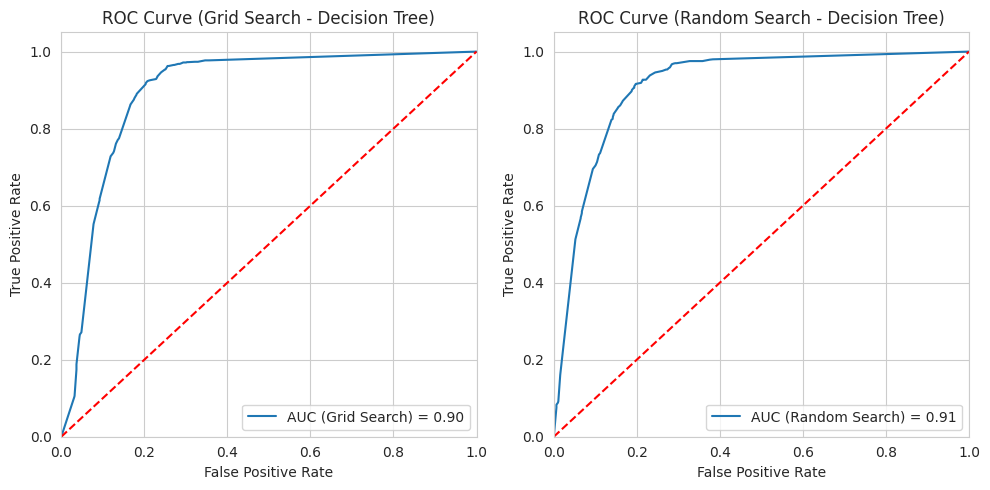

In [ ]:
# ROC curve and AUC for the best grid search model for Decision Tree
y_pred_proba_cv_dt_recall = dt_cv_recall.predict_proba(X_test_scaled)[:, 1]
fpr_cv_dt_recall, tpr_cv_dt_recall, _ = roc_curve(y_test, y_pred_proba_cv_dt_recall)
roc_auc_cv_dt_recall = auc(fpr_cv_dt_recall, tpr_cv_dt_recall)

print(roc_auc_cv_dt_recall)

# ROC curve and AUC for the best random search model for Decision Tree
y_pred_proba_rs_dt_recall = dt_rs_recall.predict_proba(X_test_scaled)[:, 1]
fpr_rs_dt_recall, tpr_rs_dt_recall, _ = roc_curve(y_test, y_pred_proba_rs_dt_recall)
roc_auc_rs_dt_recall = auc(fpr_rs_dt_recall, tpr_rs_dt_recall)

print(roc_auc_rs_dt_recall)

# Plotting ROC Curves for both grid search and random search best models for Decision Tree
plt.figure(figsize=(10, 5))

# ROC Curve for the best grid search model for Decision Tree
plt.subplot(1, 2, 1)
plt.plot(fpr_cv_dt_recall, tpr_cv_dt_recall, label=f'AUC (Grid Search) = {roc_auc_cv_dt_recall:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Grid Search - Decision Tree)')
plt.legend(loc="lower right")

# ROC Curve for the best random search model for Decision Tree
plt.subplot(1, 2, 2)
plt.plot(fpr_rs_dt_recall, tpr_rs_dt_recall, label=f'AUC (Random Search) = {roc_auc_rs_dt_recall:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search - Decision Tree)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Random Forest

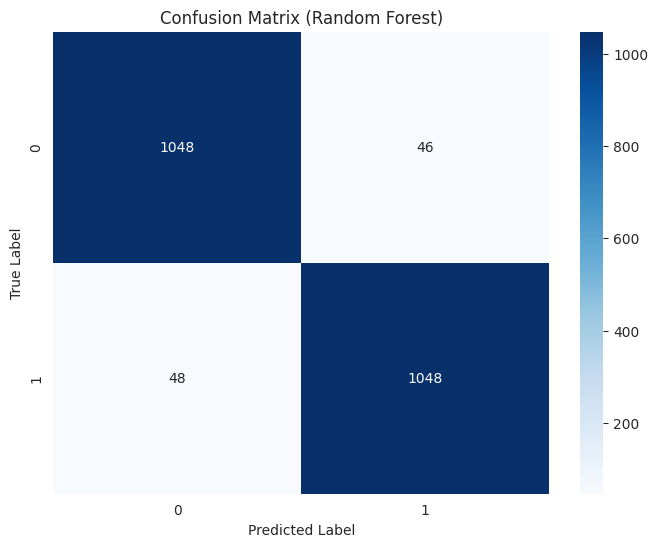

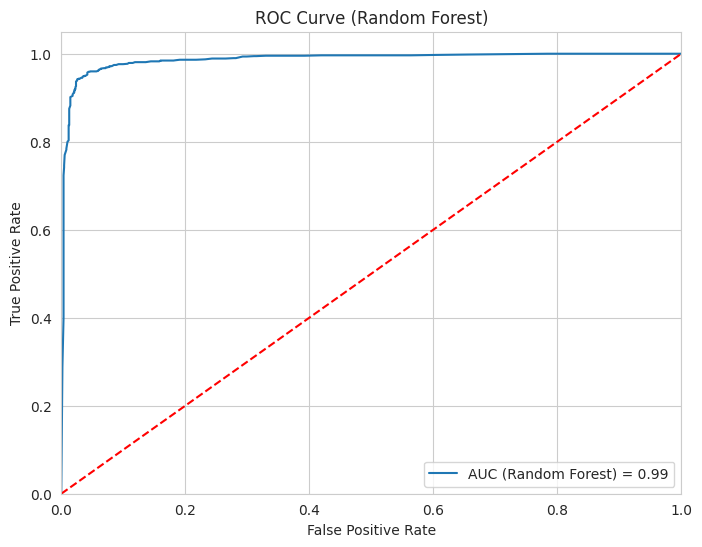

Accuracy: 0.9570776255707762
Recall: 0.9562043795620438
Precision: 0.9579524680073126
F1 Score: 0.9570776255707762
AUC: 0.9870423778006112
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1094
           1       0.96      0.96      0.96      1096

    accuracy                           0.96      2190
   macro avg       0.96      0.96      0.96      2190
weighted avg       0.96      0.96      0.96      2190



In [ ]:
# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)


#Created pickle to save trained model for futher process
# Save the trained model to a pickle file
with open('trained_rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Provide the path to the saved model
saved_model_path = 'trained_rf_model.pkl'
saved_model_path

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC curve and AUC for Random Forest model
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Return the metrics
rf_results = {
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'AUC': roc_auc_rf,
    'Classification Report': class_report_rf
}

# Print the metrics in the rf_results dictionary separately with names
for metric, value in rf_results.items():
    print(f"{metric}: {value}")

In [ ]:
# Parameter grid and distributions for grid and random search for Random Forest

smaller_param_grid_rf_recall = {
    'n_estimators': [10, 50],  # number of trees
    'max_depth': [None, 5],  # maximum depth of the tree
    'min_samples_split': [2, 5],  # samples required to split a node
    'min_samples_leaf': [1, 2]  # samples required at a leaf node
}

# Grid Search with recall scoring for Random Forest
rf_cv_recall = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=smaller_param_grid_rf_recall,
    cv=3,  # using 3-fold cross-validation for quicker computation
    scoring='recall',
    n_jobs=-1  # using all processors to speed up the training
)
rf_cv_recall.fit(X_train_scaled, y_train)

# Random Search with recall scoring for Random Forest
rf_rs_recall = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=smaller_param_grid_rf_recall,
    n_iter=5,  # fewer iterations for quicker computation
    cv=3,  # using 3-fold cross-validation for quicker computation
    scoring='recall',
    random_state=1,
    n_jobs=-1  # using all processors to speed up the training
)
rf_rs_recall.fit(X_train_scaled, y_train)

# Recall for the best models from both searches
recall_cv_rf_recall_smaller = recall_score(y_test, rf_cv_recall.predict(X_test_scaled))
recall_rs_rf_recall_smaller = recall_score(y_test, rf_rs_recall.predict(X_test_scaled))

# Best parameters from both searches
best_params_cv_rf_recall_smaller = rf_cv_recall.best_params_
best_params_rs_rf_recall_smaller = rf_rs_recall.best_params_

# Print the best parameters and recall scores for the RF model using grid search and random search
print("Best grid search parameters and recall score:")
print(f"Parameters: {best_params_cv_rf_recall_smaller}")
print(f"Recall: {recall_cv_rf_recall_smaller}")

print("\nBest random search parameters and recall score:")
print(f"Parameters: {best_params_rs_rf_recall_smaller}")
print(f"Recall: {recall_rs_rf_recall_smaller}")



Best grid search parameters and recall score:
Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Recall: 0.9552919708029197

Best random search parameters and recall score:
Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Recall: 0.9552919708029197


0.988488971029771
0.9881737146212253


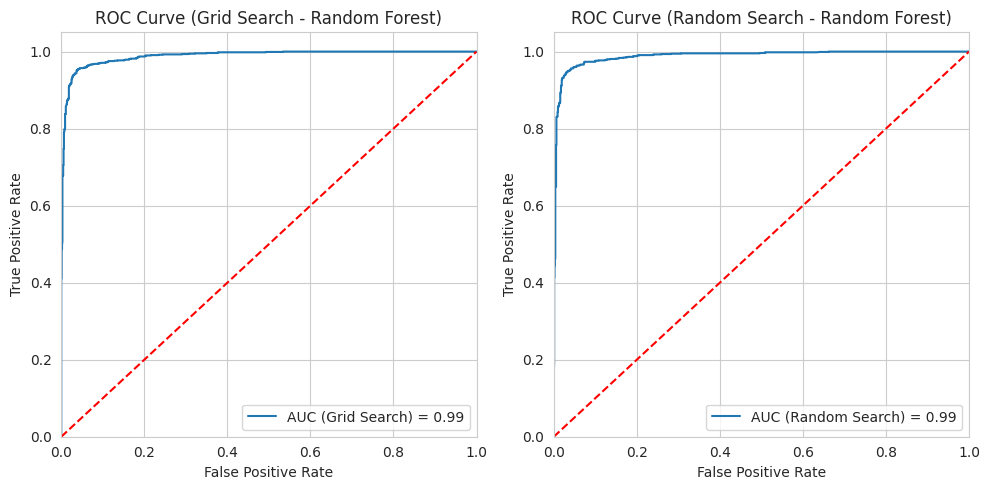

In [ ]:
# ROC curve and AUC for the best grid search model for Random Forest
y_pred_proba_cv_rf_recall = rf_cv_recall.predict_proba(X_test_scaled)[:, 1]
fpr_cv_rf_recall, tpr_cv_rf_recall, _ = roc_curve(y_test, y_pred_proba_cv_rf_recall)
roc_auc_cv_rf_recall = auc(fpr_cv_rf_recall, tpr_cv_rf_recall)

print(roc_auc_cv_rf_recall)

# ROC curve and AUC for the best random search model for Random Forest
y_pred_proba_rs_rf_recall = rf_rs_recall.predict_proba(X_test_scaled)[:, 1]
fpr_rs_rf_recall, tpr_rs_rf_recall, _ = roc_curve(y_test, y_pred_proba_rs_rf_recall)
roc_auc_rs_rf_recall = auc(fpr_rs_rf_recall, tpr_rs_rf_recall)

print(roc_auc_rs_rf_recall)

# Plotting ROC Curves for both grid search and random search best models for Random Forest
plt.figure(figsize=(10, 5))

# ROC Curve for the best grid search model for Random Forest with the smaller grid
plt.subplot(1, 2, 1)
plt.plot(fpr_cv_rf_recall, tpr_cv_rf_recall, label=f'AUC (Grid Search) = {roc_auc_cv_rf_recall:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Grid Search - Random Forest)')
plt.legend(loc="lower right")

# ROC Curve for the best random search model for Random Forest
plt.subplot(1, 2, 2)
plt.plot(fpr_rs_rf_recall, tpr_rs_rf_recall, label=f'AUC (Random Search) = {roc_auc_rs_rf_recall:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search - Random Forest)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### XGBoost :

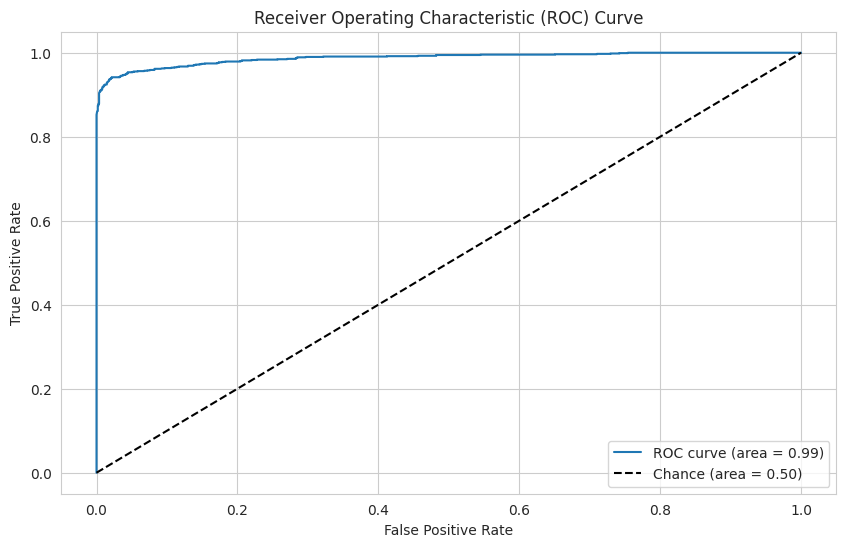

Accuracy: 0.954337899543379
F1 Score: 0.9539594843462248
Recall: 0.9452554744525548
Precision: 0.9628252788104089
Confusion Matrix:
[[1054   40]
 [  60 1036]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1094
           1       0.96      0.95      0.95      1096

    accuracy                           0.95      2190
   macro avg       0.95      0.95      0.95      2190
weighted avg       0.95      0.95      0.95      2190



In [ ]:
# Fit XGBoost to the scaled training set
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]


# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute the FPR and TPR at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


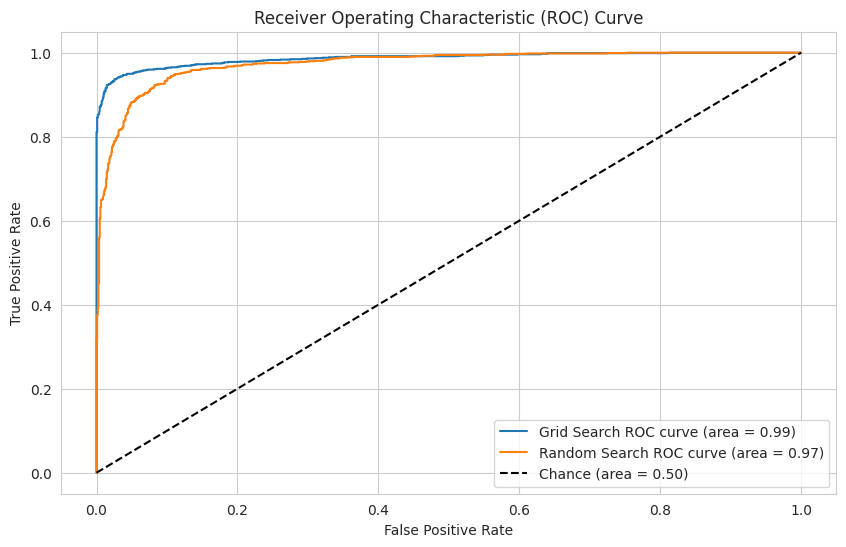

Best Grid Search Recall: 0.952718600655356
Best Random Search Recall: 0.949519280422883


In [ ]:
# Define the model and pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=1))
])

# Define Grid Search parameters
param_grid = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__subsample': [0.5, 0.7, 1.0]
}

# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from Grid Search
best_model_grid = grid_search.best_estimator_

# Define Random Search parameters
param_dist = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__subsample': [0.5, 0.7, 1.0]
}

# Initialize Random Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='recall', verbose=1, random_state=1)
random_search.fit(X_train_scaled, y_train)

# Get the best model from Random Search
best_model_random = random_search.best_estimator_

# Predict probabilities for the test set for both models
y_prob_grid = best_model_grid.predict_proba(X_test_scaled)[:, 1]
y_prob_random = best_model_random.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC AUC score for both models
roc_auc_grid = roc_auc_score(y_test, y_prob_grid)
roc_auc_random = roc_auc_score(y_test, y_prob_random)

# Plot the ROC curve for the best Grid Search model
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_prob_grid)
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)

plt.figure(figsize=(10, 6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search ROC curve (area = {roc_auc_grid:.2f})')
plt.plot(fpr_random, tpr_random, label=f'Random Search ROC curve (area = {roc_auc_random:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the metrics
print(f"Best Grid Search Recall: {grid_search.best_score_}")
print(f"Best Random Search Recall: {random_search.best_score_}")

### Gradient Boosting:

Accuracy: 0.908675799086758
F1 Score: 0.9107142857142856
Precision: 0.8916083916083916
Recall: 0.9306569343065694
Confusion Matrix:
[[ 970  124]
 [  76 1020]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1094
           1       0.89      0.93      0.91      1096

    accuracy                           0.91      2190
   macro avg       0.91      0.91      0.91      2190
weighted avg       0.91      0.91      0.91      2190



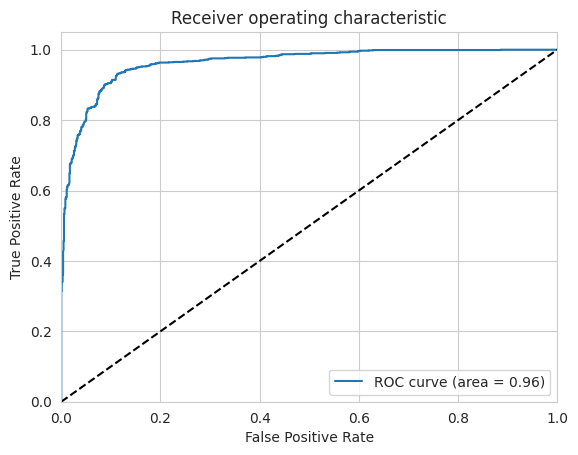

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit the model
gb_classifier.fit(X_train_scaled, y_train)

# Save the trained model to a pickle file
with open('GB_trained_rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Provide the path to the saved model
saved_model_path = 'GB_trained_rf_model.pkl'
saved_model_path

# Predict the labels for the test set
y_pred = gb_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the ROC curve
y_pred_proba = gb_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


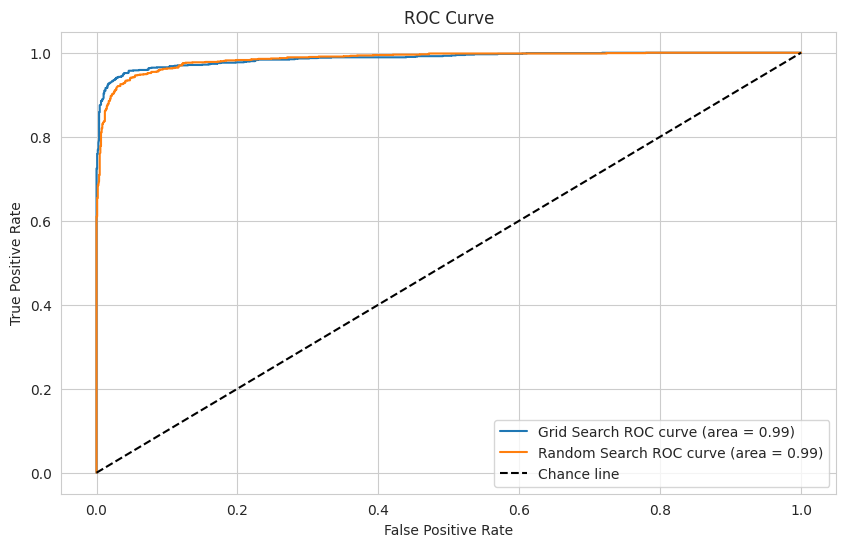

Best recall from Grid Search: 0.9518050880626223
Best hyperparameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best recall from Random Search: 0.9579715590345728
Best hyperparameters from Random Search: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Define a grid of hyperparameter ranges for Grid Search
grid_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Define a range of hyperparameters for Random Search
random_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_classifier, grid_params, scoring='recall', cv=5, verbose=1)

# Fit the model using grid search
grid_search.fit(X_train_scaled_df, y_train)

# Get the best model from grid search
best_model_grid = grid_search.best_estimator_

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gb_classifier, random_params, scoring='recall', cv=5, n_iter=10, verbose=1, random_state=1)

# Fit the model using random search
random_search.fit(X_train_scaled_df, y_train)

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Predict probabilities for the test set for both models
y_prob_grid = best_model_grid.predict_proba(X_test_scaled_df)[:, 1]
y_prob_random = best_model_random.predict_proba(X_test_scaled_df)[:, 1]

# Calculate the ROC curve and AUC for both models
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_prob_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search ROC curve (area = {roc_auc_grid:.2f})')
plt.plot(fpr_random, tpr_random, label=f'Random Search ROC curve (area = {roc_auc_random:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Output the best recall scores and hyperparameters
print(f"Best recall from Grid Search: {grid_search.best_score_}")
print(f"Best hyperparameters from Grid Search: {grid_search.best_params_}")
print(f"Best recall from Random Search: {random_search.best_score_}")
print(f"Best hyperparameters from Random Search: {random_search.best_params_}")

### SVC

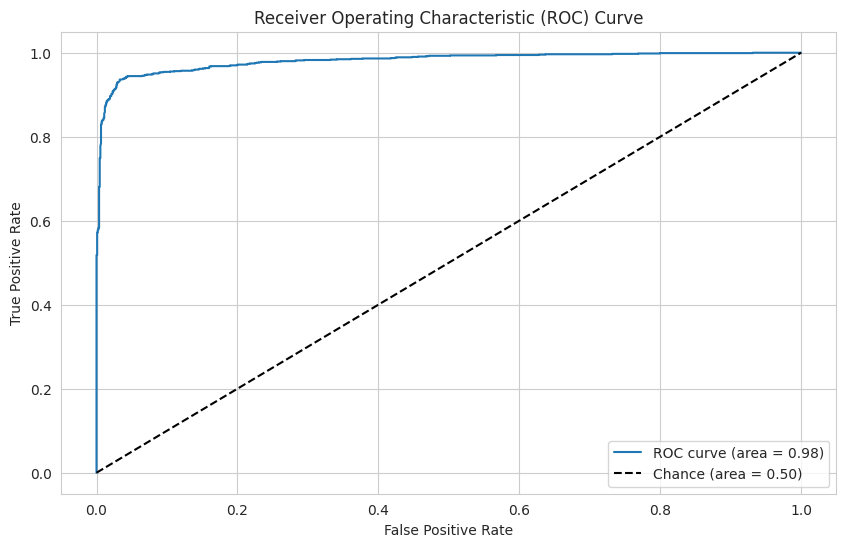

Accuracy: 0.9511415525114155
Recall: 0.9352189781021898
Precision: 0.9660697455230914
F1 Score: 0.9503940658321743
Confusion Matrix: 
[[1058   36]
 [  71 1025]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1094
           1       0.97      0.94      0.95      1096

    accuracy                           0.95      2190
   macro avg       0.95      0.95      0.95      2190
weighted avg       0.95      0.95      0.95      2190



In [ ]:
# Fit SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate the predicted probabilities
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]


# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute the FPR and TPR at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Print metrics and reports

# Define the metrics
metric_names = ["Accuracy", "Recall", "Precision", "F1 Score", "Confusion Matrix", "Classification Report"]

# Print the metrics
print(f"{metric_names[0]}: {accuracy}")
print(f"{metric_names[1]}: {recall}")
print(f"{metric_names[2]}: {precision}")
print(f"{metric_names[3]}: {f1}")
print(f"{metric_names[4]}: \n{conf_matrix}")
print(f"{metric_names[5]}: \n{class_report}")


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 0.9463235593278689 0.9847271614246254
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1} 0.9271378094084582 0.9811901179626097


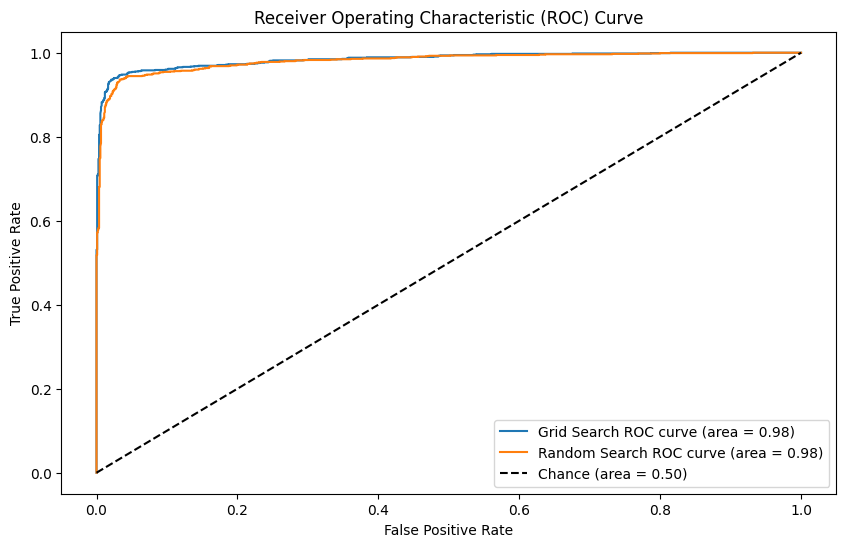

In [ ]:
# Setting up the parameter grid for the SVM
param_grid_combined = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}

# Initialize the classifier
svm_classifier = SVC(probability=True)

# Initialize Grid Search with recall scoring
grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid_combined,
    scoring='recall',
    cv=3
)

# Initialize Randomized Search with recall scoring
random_search = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=param_grid_combined,
    n_iter=3,  # Limiting to 5 iterations for demonstration
    scoring='recall',
    cv=3,
    random_state=1  # For reproducibility
)

# Fit both searches
grid_search.fit(X_train_scaled, y_train)
random_search.fit(X_train_scaled, y_train)

# Collect the best models and scores for both searches
best_grid_model = grid_search.best_estimator_
best_grid_recall = grid_search.best_score_
best_grid_params = grid_search.best_params_
grid_y_pred_proba = best_grid_model.predict_proba(X_test_scaled)[:, 1]
grid_fpr, grid_tpr, _ = roc_curve(y_test, grid_y_pred_proba)
grid_roc_auc = auc(grid_fpr, grid_tpr)

best_random_model = random_search.best_estimator_
best_random_recall = random_search.best_score_
best_random_params = random_search.best_params_
random_y_pred_proba = best_random_model.predict_proba(X_test_scaled)[:, 1]
random_fpr, random_tpr, _ = roc_curve(y_test, random_y_pred_proba)
random_roc_auc = auc(random_fpr, random_tpr)

# Results
print(grid_search.best_params_, best_grid_recall, grid_roc_auc)
print(random_search.best_params_, best_random_recall, random_roc_auc)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(grid_fpr, grid_tpr, label=f'Grid Search ROC curve (area = {grid_roc_auc:.2f})')
plt.plot(random_fpr, random_tpr, label=f'Random Search ROC curve (area = {random_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Evaluating the ticeval2000 aganist our best model from the above procedure.Random Forest and Graient Boosting is considered to be best model from our observations.So we are applying our model to ticeval2000.

In [ ]:
#Predicting on evaluation data set by Random Forest Model
# Load the pickled model
with open('trained_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Assuming eval_data is your raw data for evaluation
# Assuming correlated_features is a list of features that match your training data's features
eval_data = eval_data[correlated_features]

# Assuming scaler is the pre-fitted scaler object used on your training data
X_eval_scaled = scaler.transform(eval_data)

# Predict on the scaled evaluation data using the loaded trained model
y_pred_eval = loaded_model.predict(X_eval_scaled)

# Calculate metrics using the predictions and the actual targets from target_data
accuracy_eval = accuracy_score(target_data, y_pred_eval)
recall_eval = recall_score(target_data, y_pred_eval)
precision_eval = precision_score(target_data, y_pred_eval)
f1_score_eval = f1_score(target_data, y_pred_eval)

# confusion matrix
conf_matrix = confusion_matrix(target_data, y_pred_eval)
print('Confusion Matrix:')
print(conf_matrix)

# classification report
class_report = classification_report(target_data, y_pred_eval)
print('Classification Report:')
print(class_report)

# Output the calculated metrics
print(f'Accuracy: {accuracy_eval}')
print(f'Recall: {recall_eval}')
print(f'Precision: {precision_eval}')
print(f'F1 Score: {f1_score_eval}')


Confusion Matrix:
[[3593  169]
 [ 204   34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3762
           1       0.17      0.14      0.15       238

    accuracy                           0.91      4000
   macro avg       0.56      0.55      0.55      4000
weighted avg       0.90      0.91      0.90      4000

Accuracy: 0.90675
Recall: 0.14285714285714285
Precision: 0.16748768472906403
F1 Score: 0.15419501133786848


In [ ]:
#Prediction on evaluation data set by Gradient Boosting Model
# Load the pickled model
with open('GB_trained_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Assuming eval_data is your raw data for evaluation
# Assuming correlated_features is a list of features that match your training data's features
eval_data = eval_data[correlated_features]

# Assuming scaler is the pre-fitted scaler object used on your training data
X_eval_scaled = scaler.transform(eval_data)

# Predict on the scaled evaluation data using the loaded trained model
y_pred_eval = loaded_model.predict(X_eval_scaled)

# Calculate metrics using the predictions and the actual targets from target_data
accuracy_eval = accuracy_score(target_data, y_pred_eval)
recall_eval = recall_score(target_data, y_pred_eval)
precision_eval = precision_score(target_data, y_pred_eval)
f1_score_eval = f1_score(target_data, y_pred_eval)

# confusion matrix
conf_matrix = confusion_matrix(target_data, y_pred_eval)
print('Confusion Matrix:')
print(conf_matrix)

# classification report
class_report = classification_report(target_data, y_pred_eval)
print('Classification Report:')
print(class_report)

# Output the calculated metrics
print(f'Accuracy: {accuracy_eval}')
print(f'Recall: {recall_eval}')
print(f'Precision: {precision_eval}')
print(f'F1 Score: {f1_score_eval}')


Confusion Matrix:
[[3593  169]
 [ 204   34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3762
           1       0.17      0.14      0.15       238

    accuracy                           0.91      4000
   macro avg       0.56      0.55      0.55      4000
weighted avg       0.90      0.91      0.90      4000

Accuracy: 0.90675
Recall: 0.14285714285714285
Precision: 0.16748768472906403
F1 Score: 0.15419501133786848


### Decision Tree:

Accuracy: 0.913
Recall: 0.936
Precision: 0.895
F1 Score: 0.915
Hyperparameters (Grid Search): Recall: 0.9251824817518248
Hyperparameters (Random Search):  Recall: 0.9142335766423357
AUC (Grid Search): 0.897
AUC (Random Search): 0.912


### Random Forest:

Accuracy: 0.957
Recall: 0.956
Precision: 0.958
F1 Score: 0.957
Best Hyperparameters (Grid Search): Recall: 0.9552919708029197
Best Hyperparameters (Random Search): Recall: 0.9552919708029197
AUC (Grid Search): 0.988
AUC (Random Search): 0.988


### XGBoost:

Accuracy: 0.954
Recall: 0.945
Precision: 0.963
F1 Score: 0.954
Best Hyperparameters (Grid Search Recall): 0.953
Best Hyperparameters (Random Search Recall): 0.950
ROC Curve (Grid Search): 0.990
ROC Curve (Random Search): 0.970


### Gradient Boost:

Accuracy: 0.909
Recall: 0.931
Precision: 0.892
F1 Score: 0.911
Best Hyperparameters (Grid Search Recall): 0.952
Best Hyperparameters (Random Search Recall): 0.958
ROC Curve: 0.960


### Support Vector Classifier (SVC):

Accuracy: 0.951
Recall: 0.935
Precision: 0.966
F1 Score: 0.950
Best Hyperparameters (Grid Search): recall : 0.946
Best Hyperparameters (Random Search): recall : 0.927
ROC Curve: 0.980


### Summary:

The goal is to maximize recall (identifying customers who will buy caravan insurance), then the Random Forest model with hyperparameters obtained from Grid Search seems to be the best choice, as it has the highest recall among all models.

Additionally, the Random Forest model also has a high AUC (0.988), indicating good overall performance in terms of distinguishing between positive and negative cases.And next best model is Gradient boost.

To predicting customer behavior in terms of insurance purchases, I prioritize recall because in my business case, missing out on a potential buyer is a significant loss. It's more costly for me if I overlook someone who would have bought insurance (a false negative) than it is to mistakenly target someone who wouldn't (a false positive). A high recall assures that I don't miss many customers who are likely to convert.

The  objective is to maximize outreach to all potential buyers; hence, a model with high recall is essential to ensure I'm reaching as many prospective customers as possible.

Nonetheless,focusing solely on recall isn't without drawbacks. It could lead to targeting many non-buyers, which not only wastes resources but also risks irritating them, potentially harming brand's reputation.

To strike a balance, I consider the F1 score, which harmonizes precision and recall, especially because my classes are imbalanced. I also carry out a cost-benefit analysis to weigh the financial impact of false positives and false negatives.


When we try to predict the evaluation data set based on my best model from my train data set,observed  low recall and precision values which can be due to over fitting or data is too low to predict,we  checked regarding overfitting we didnt find any evidence of overfitting,so we want to  conclude data test is not large enough and its causing issue here.


